# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Alif Aqila Hakim
- **Email:** alifaqilahakim@gmail.com
- **ID Dicoding:** alif_aqila_hakim

## Menentukan Pertanyaan Bisnis

- Bagaimana dampak suhu terhadap level PM2.5?
- Apakah arah angin (wd) berhubungan dengan tingkat polusi yang berbeda?


## Import Semua Packages/Library yang Digunakan

In [43]:
# Import library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
# Inisiasi dataset
url="https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv"
df = pd.read_csv(url)

print(df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


**Insight:**
- Sumber data dikumpulkan dalam inisiasi variabel bernama df
- Dengan menggunakan function head() pada variabel df, didapat informasi bahwasanya data bersangkutan memiliki total 18 kolom / feature yang berbeda

### Assessing Data

Menilai tabel df

In [10]:
df.info()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 t

In [11]:
df.isna().sum()
print(df.isna().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [12]:
df.duplicated().sum()
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
df.describe()
print(df.describe())

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017    

**Insight:**
- Terdapat 18 kolom dengan mayoritas data numerik berupa float ataupun integer
- Terdapat missing value pada beberapa kolom dataset yaitu PM2.5, PM10, SO2, NO2, CO, O3 dan kolom lainnya.
- Distribusi dari polutan PM2.5 dan PM10 cenderung skewed right, yang berarti sebagian besar waktu konsentrasi polutan berada di level yang relatif rendah.
- Tidak ada baris yang memiliki duplikat, semua nilai unik dan tunggal pada dataset ini

### Cleaning Data

Membersihkan tabel df

In [15]:
#Duplicate data
df.duplicated().sum()
df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
#Missing values
df.isnull().sum()

# Di sini kita melihat bahwa beberapa kolom memiliki nilai hilang, misalnya, PM2.5, PM10, SO2, NO2, CO, O3, dan beberapa kolom meteorologi.
# Untuk menjaga kelangsungan data waktu, kita menggunakan metode interpolasi linear untuk mengisi nilai hilang.
# Metode ini mengisi data yang hilang berdasarkan tren data sebelumnya dan sesudahnya.

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [23]:
# Mengisi nilai yang hilang dengan interpolasi linear
df_interpolated = df.interpolate(method='linear', limit_direction='forward')

<ipython-input-23-02d1dd2bbfc8>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='linear', limit_direction='forward')


In [25]:
#Konversi kolom waktu menjadi satu kolom datetime
# Menggabungkan kolom tahun, bulan, hari, dan jam menjadi satu kolom datetime untuk analisis berbasis waktu
df_interpolated['datetime'] = pd.to_datetime(df_interpolated[['year', 'month', 'day', 'hour']])

In [27]:
#Menghapus kolom year, month, day, dan hour karena sudah tergabung dalam kolom datetime
df_final = df_interpolated.drop(columns=['year', 'month', 'day', 'hour'])

**Insight:**
- Pada pengecekan data duplikat, tidak ditemukan data yang duplicated
- Pada pengecekan data missing, didapat beberapa kolom yang memiliki missing data yaitu pada PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,dan WSPM
- Penanggulangan missing data tersebut dilakukan metode interpolasi linear karena dapat mengisi data hilang berdasarkan tren data sebelum dan sesudahnya sehingga menjaga keakuratan dataset nya


## Exploratory Data Analysis (EDA)

### Explore df

In [29]:
# Melihat statistik deskriptif dari data untuk mendapatkan gambaran umum, termasuk rata-rata, median, maksimum, dan minimum dari setiap kolom.
print(df_final.describe())

                 No         PM2.5          PM10           SO2           NO2  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000     82.540623    110.210033     17.459251     59.074106   
min        1.000000      3.000000      2.000000      0.285600      2.000000   
25%     8766.750000     22.000000     38.000000      3.000000     30.000000   
50%    17532.500000     58.000000     87.000000      9.000000     53.000000   
75%    26298.250000    114.000000    154.000000     22.000000     81.000000   
max    35064.000000    898.000000    984.000000    341.000000    290.000000   
std    10122.249256     81.956401     95.262531     22.702284     37.000918   

                 CO            O3          TEMP          PRES          DEWP  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean    1264.692405     55.328626     13.581414   1011.851650      3.120296   
min      100.000000      0.214200    -16.800000    

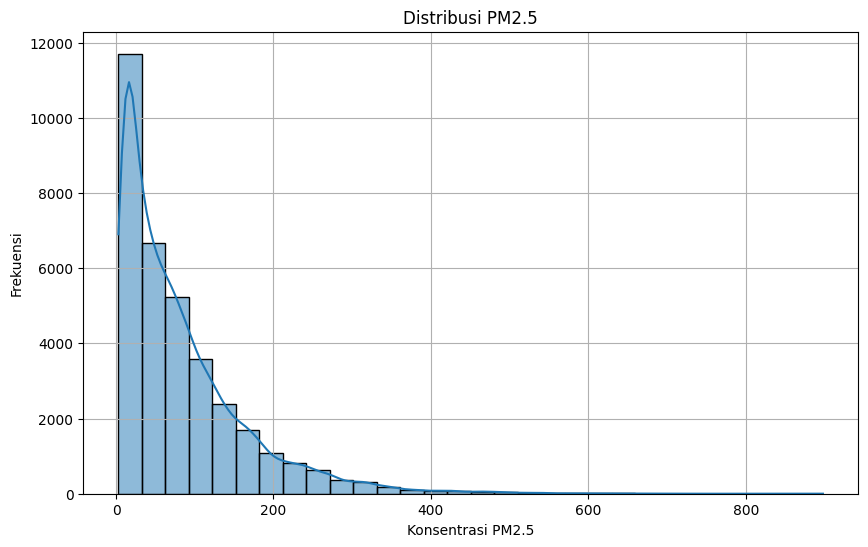

In [30]:
# Visualisasi Distribusi PM2.5

# Menampilkan distribusi nilai PM2.5 dengan histogram untuk memahami sebaran data polusi.
plt.figure(figsize=(10, 6))
sns.histplot(df_final['PM2.5'], bins=30, kde=True)
plt.title('Distribusi PM2.5')
plt.xlabel('Konsentrasi PM2.5')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

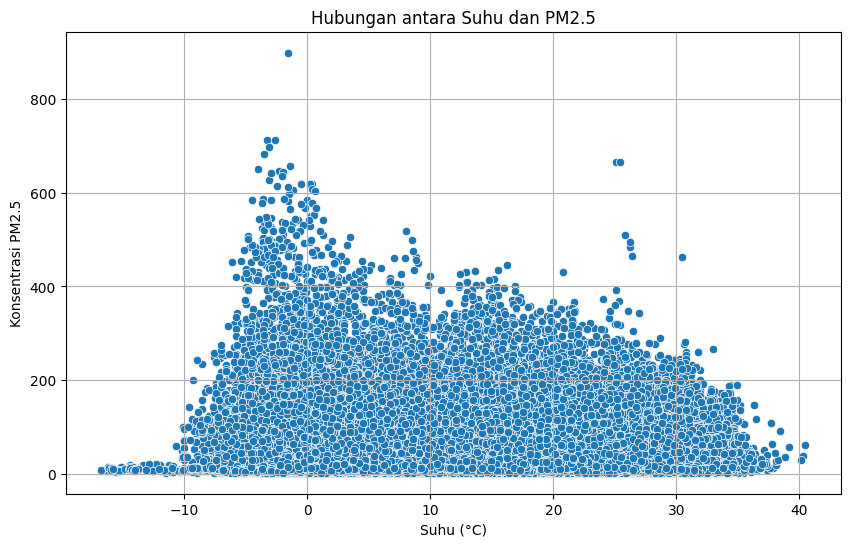

In [31]:
# Visualisasi Hubungan antara PM2.5 dan Suhu

# Menggunakan scatter plot untuk melihat apakah ada pola atau hubungan antara PM2.5 dan suhu (TEMP).
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=df_final)
plt.title('Hubungan antara Suhu dan PM2.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi PM2.5')
plt.grid(True)
plt.show()

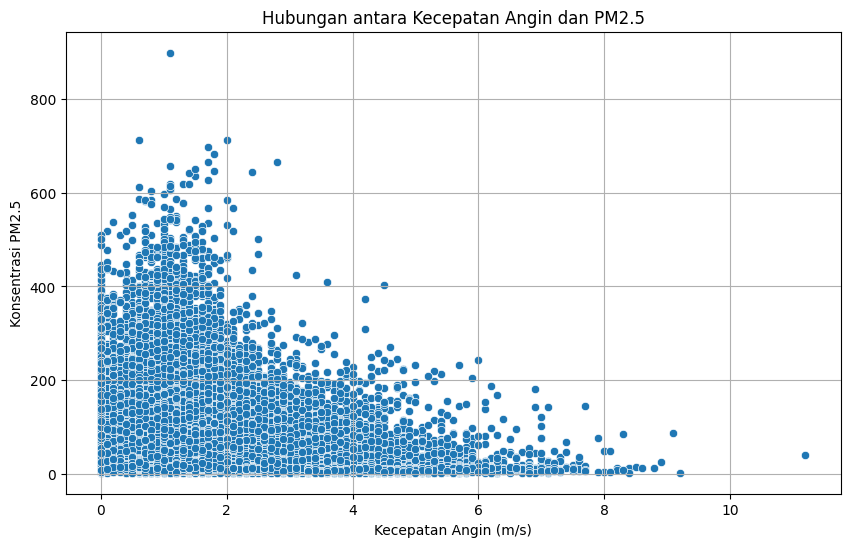

In [32]:
# Visualisasi Hubungan antara PM2.5 dan Kecepatan Angin (WSPM)

# Menggunakan scatter plot untuk melihat hubungan antara kecepatan angin dan konsentrasi PM2.5.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WSPM', y='PM2.5', data=df_final)
plt.title('Hubungan antara Kecepatan Angin dan PM2.5')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Konsentrasi PM2.5')
plt.grid(True)
plt.show()

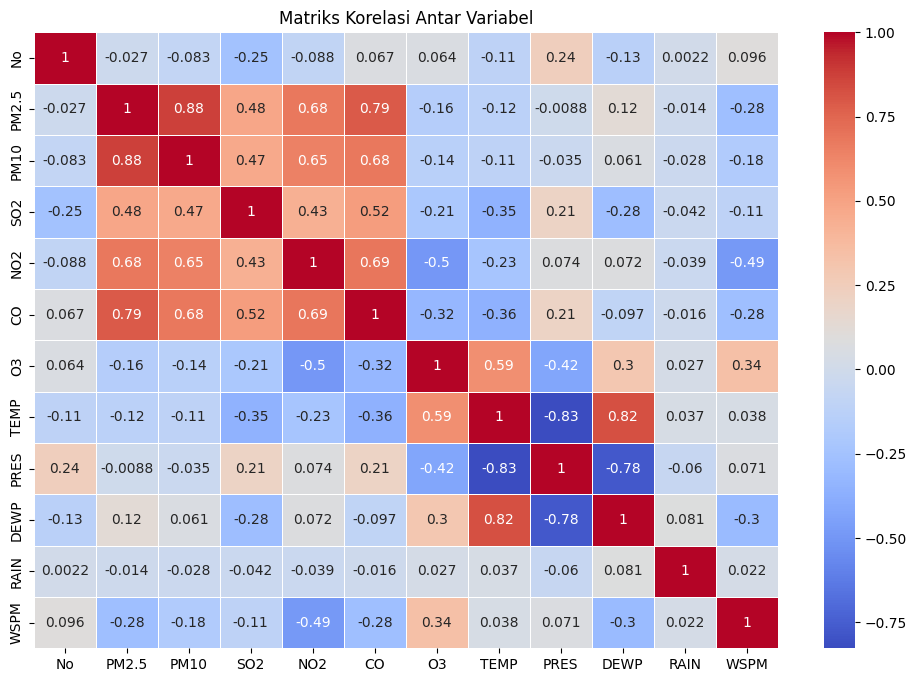

In [34]:
# Menghitung korelasi hanya untuk kolom numerik

# Karena kolom "wd" adalah kategori (bukan numerik), kita harus mengecualikannya dari perhitungan korelasi.
df_numerical = df_final.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = df_numerical.corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

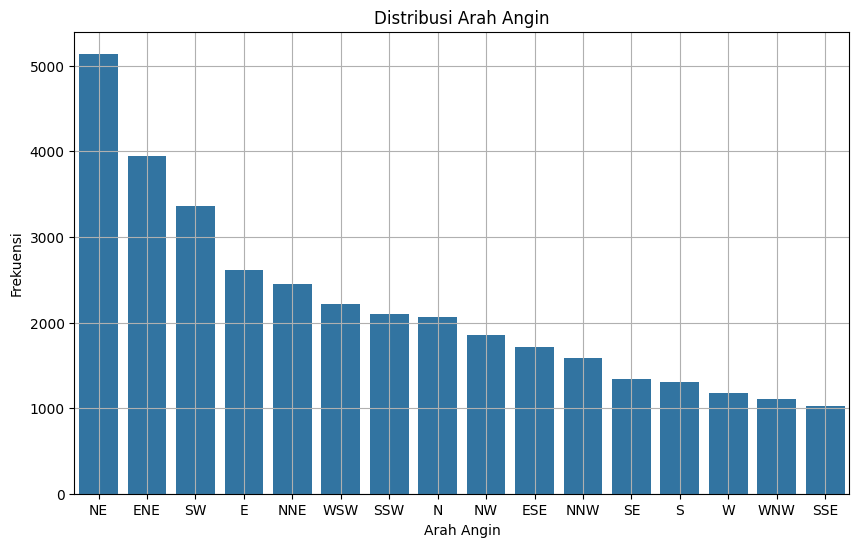

In [35]:
# Distribusi arah angin (wd)

# Menampilkan distribusi arah angin untuk memahami arah angin dominan di lokasi tersebut.
plt.figure(figsize=(10, 6))
sns.countplot(x='wd', data=df_final, order=df_final['wd'].value_counts().index)
plt.title('Distribusi Arah Angin')
plt.xlabel('Arah Angin')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

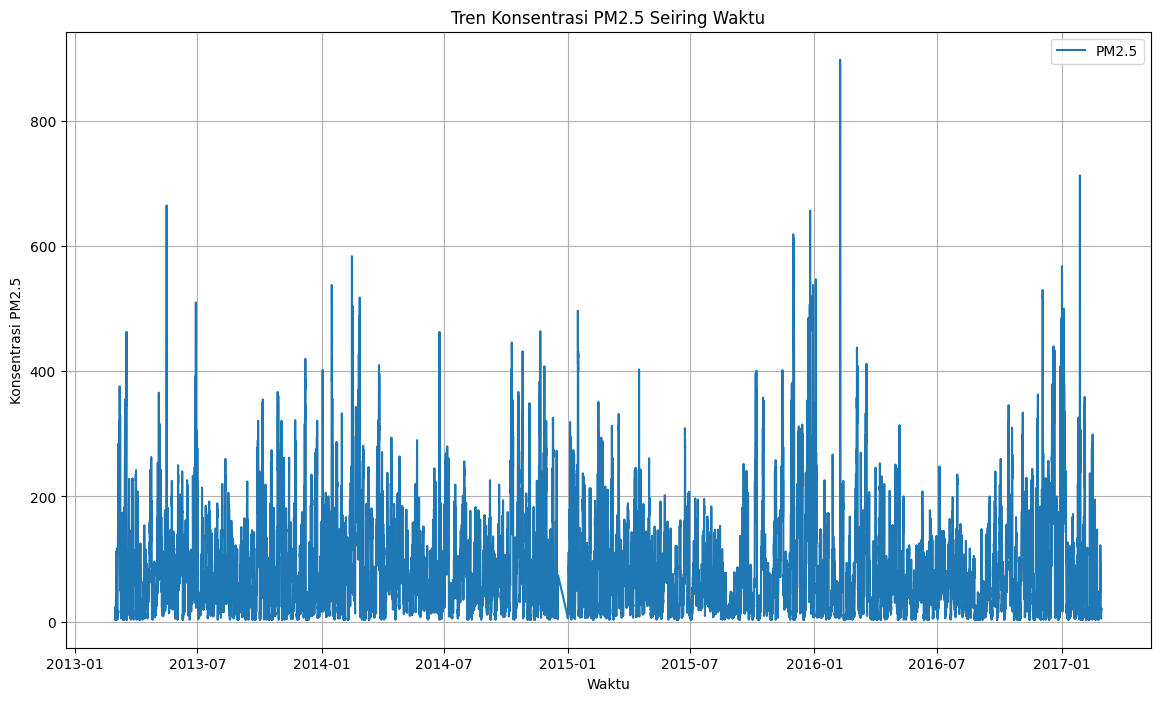

In [36]:
# Rren Waktu untuk PM2.5

# Memplot tren waktu untuk konsentrasi PM2.5 agar dapat melihat bagaimana polusi berubah seiring waktu.
plt.figure(figsize=(14, 8))
plt.plot(df_final['datetime'], df_final['PM2.5'], label='PM2.5')
plt.title('Tren Konsentrasi PM2.5 Seiring Waktu')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi PM2.5')
plt.grid(True)
plt.legend()
plt.show()

**Insight:**
- Distribusi PM2.5: Sebagian besar data berada di level rendah (di bawah 100 µg/m³), namun ada beberapa kejadian dengan polusi sangat tinggi (lebih dari 600 µg/m³).

- Hubungan Suhu dan PM2.5: Tidak ada hubungan yang jelas, tetapi konsentrasi PM2.5 cenderung lebih tinggi pada suhu rendah (di bawah 0°C), mungkin akibat inversi suhu.

- Hubungan Kecepatan Angin dan PM2.5: Semakin tinggi kecepatan angin, konsentrasi PM2.5 menurun, menunjukkan angin membantu menyebarkan polutan.

- Matriks Korelasi: PM2.5 sangat berkorelasi dengan PM10 (+0.88), CO (+0.79), dan NO2 (+0.68), yang menandakan sumber polusi yang sama.

- Distribusi Arah Angin: Angin dominan dari arah NE dan ENE, yang bisa memengaruhi penyebaran polusi.

- Tren Waktu PM2.5: Polusi cenderung lebih tinggi di musim dingin, dengan fluktuasi tajam selama beberapa periode tertentu.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana dampak suhu terhadap level PM2.5?

In [63]:
# 1. Mengambil sampel acak dari dataset
sample_size = 500  # Menentukan ukuran sampel
df_sample = df_final.sample(n=sample_size, random_state=1)  # Mengambil sampel acak

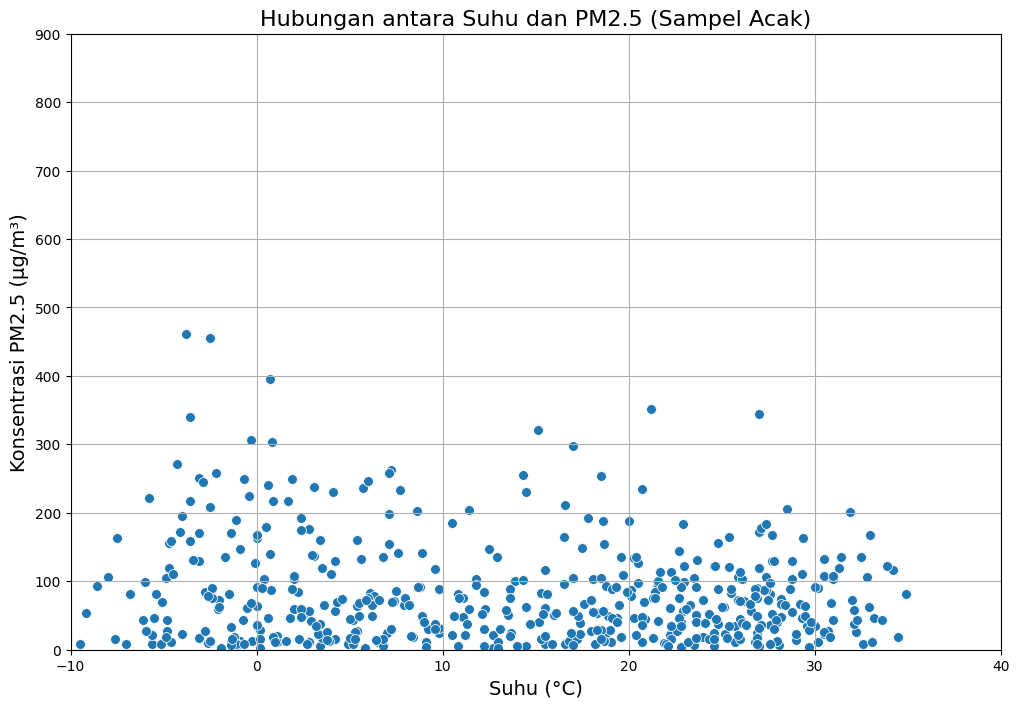

In [64]:
# 2. Visualisasi Scatter Plot antara Suhu (TEMP) dan PM2.5 dengan data sampel
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TEMP', y='PM2.5', data=df_sample, s=50)  # Ukuran marker lebih besar untuk visibilitas
plt.title('Hubungan antara Suhu dan PM2.5 (Sampel Acak)', fontsize=16)
plt.xlabel('Suhu (°C)', fontsize=14)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=14)
plt.grid(True)
plt.xlim(-10, 40)  # Batasi sumbu x untuk fokus pada kisaran suhu yang relevan
plt.ylim(0, 900)   # Batasi sumbu y untuk fokus pada kisaran konsentrasi PM2.5
plt.show()

In [65]:
# 3. Regresi Linier antara Suhu dan PM2.5 dengan data sampel
X = df_sample['TEMP']
y = df_sample['PM2.5']
X = sm.add_constant(X)  # Menambahkan konstanta untuk model

# Membangun model regresi linier
model = sm.OLS(y, X).fit()

# Mencetak ringkasan model regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.98
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           0.000989
Time:                        16:31:52   Log-Likelihood:                -2852.1
No. Observations:                 500   AIC:                             5708.
Df Residuals:                     498   BIC:                             5717.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.2647      5.026     18.556      0.0

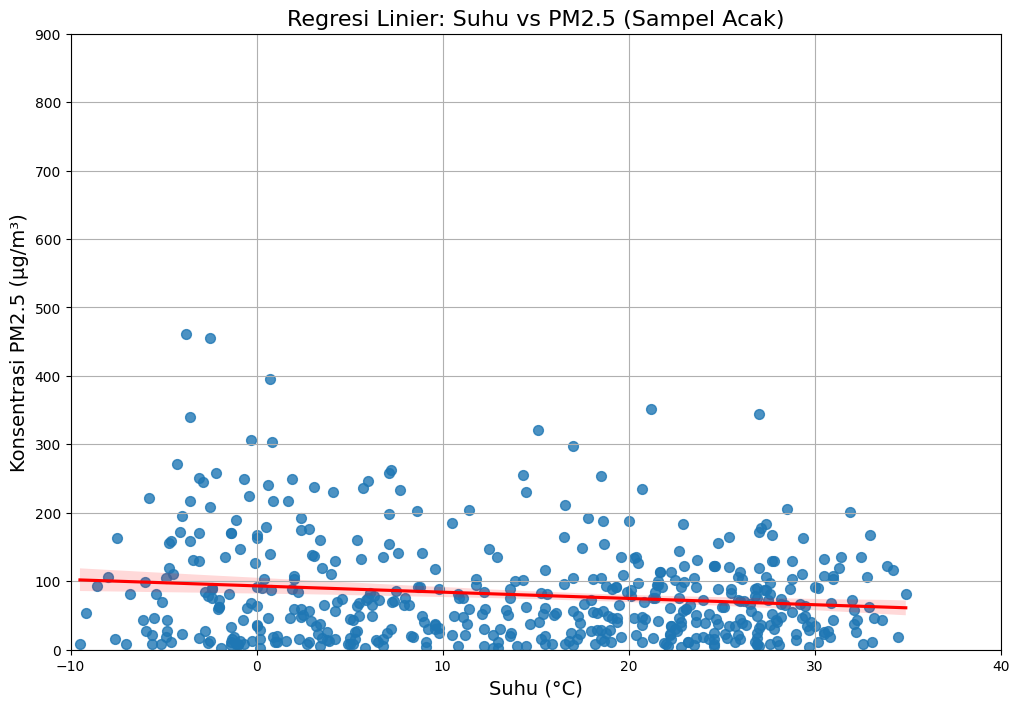

In [66]:
# 4. Visualisasi Regresi Linier
plt.figure(figsize=(12, 8))
sns.regplot(x='TEMP', y='PM2.5', data=df_sample, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regresi Linier: Suhu vs PM2.5 (Sampel Acak)', fontsize=16)
plt.xlabel('Suhu (°C)', fontsize=14)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=14)
plt.grid(True)
plt.xlim(-10, 40)
plt.ylim(0, 900)
plt.show()

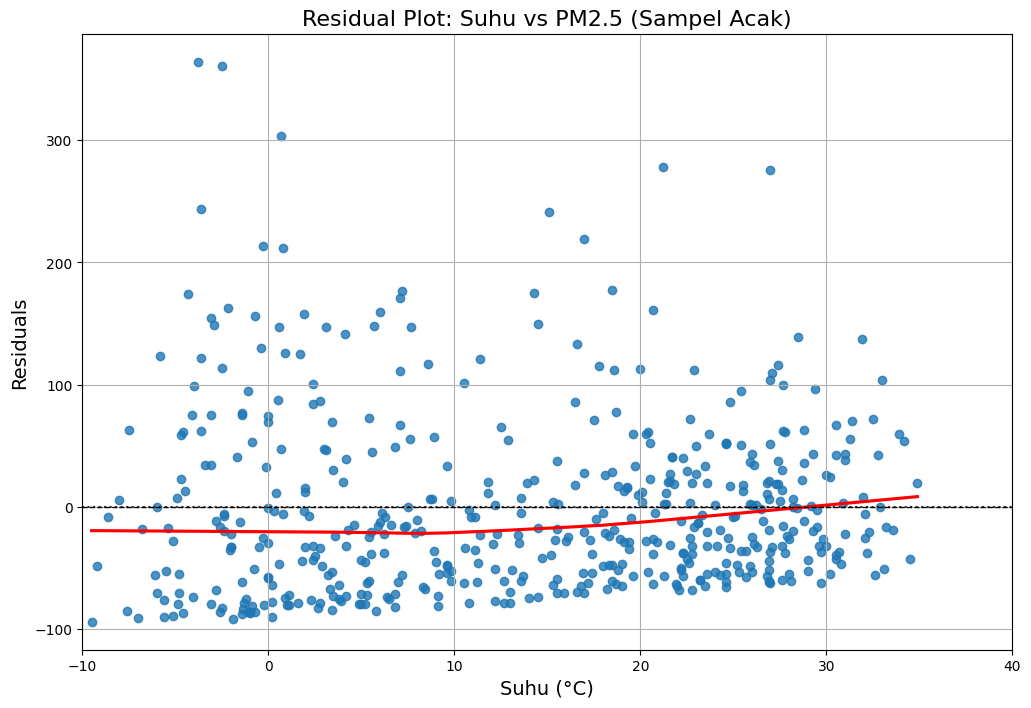

In [68]:
# 5. Residual Plot
plt.figure(figsize=(12, 8))
sns.residplot(x='TEMP', y='PM2.5', data=df_sample, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot: Suhu vs PM2.5 (Sampel Acak)', fontsize=16)
plt.xlabel('Suhu (°C)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.xlim(-10, 40)
plt.show()

### Pertanyaan 2:

Apakah arah angin (wd) berhubungan dengan tingkat polusi yang berbeda?

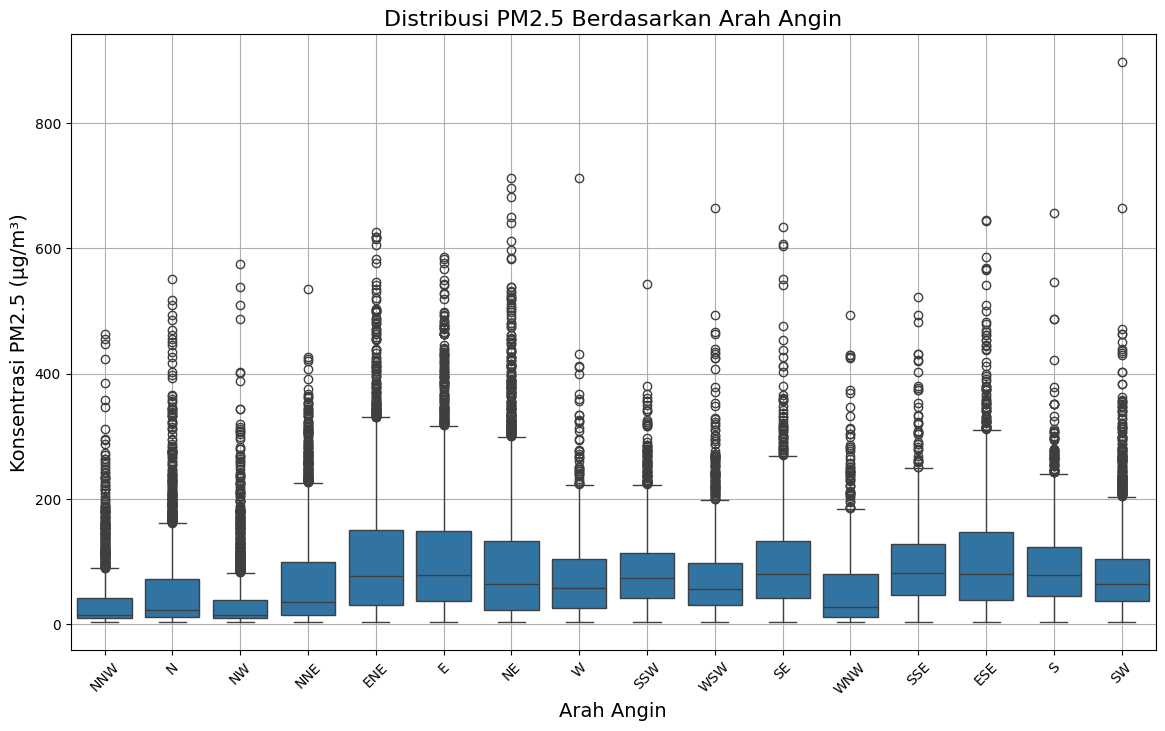

In [69]:
# 1. Visualisasi Box Plot untuk PM2.5 berdasarkan Arah Angin (wd)
plt.figure(figsize=(14, 8))
sns.boxplot(x='wd', y='PM2.5', data=df_final)
plt.title('Distribusi PM2.5 Berdasarkan Arah Angin', fontsize=16)
plt.xlabel('Arah Angin', fontsize=14)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=14)
plt.xticks(rotation=45)  # Memutar label sumbu x untuk visibilitas yang lebih baik
plt.grid(True)
plt.show()

In [71]:
# 2. Menghitung rata-rata PM2.5 untuk setiap arah angin
mean_pm25_by_wd = df_final.groupby('wd')['PM2.5'].mean().reset_index()
mean_pm25_by_wd.columns = ['Arah Angin', 'Rata-rata PM2.5 (µg/m³)']

# 3. Menampilkan rata-rata PM2.5 berdasarkan arah angin
print(mean_pm25_by_wd)

   Arah Angin  Rata-rata PM2.5 (µg/m³)
0           E               108.119806
1         ENE               104.681344
2         ESE               106.033721
3           N                55.685653
4          NE                93.407032
5         NNE                68.086733
6         NNW                37.153312
7          NW                37.311411
8           S                94.362386
9          SE                99.666272
10        SSE                97.932937
11        SSW                86.435106
12         SW                79.714761
13          W                74.331693
14        WNW                56.628530
15        WSW                74.074365


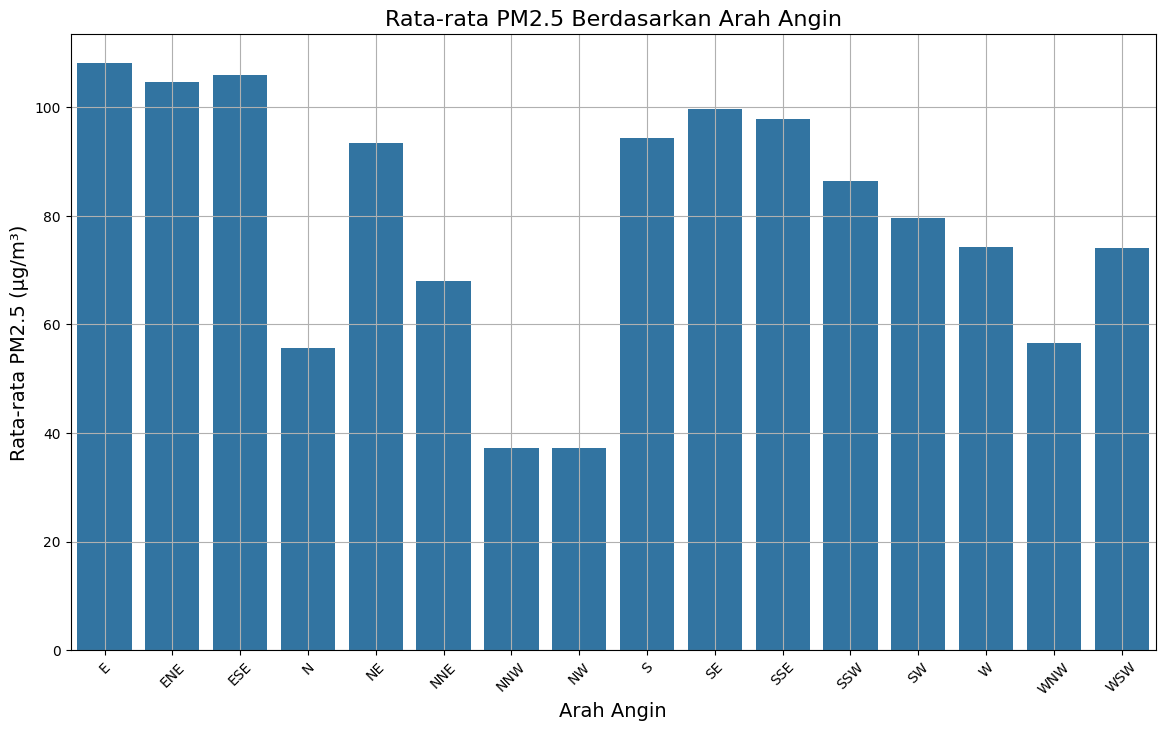

In [72]:
# 4. Visualisasi Rata-rata PM2.5 berdasarkan Arah Angin
plt.figure(figsize=(14, 8))
sns.barplot(x='Arah Angin', y='Rata-rata PM2.5 (µg/m³)', data=mean_pm25_by_wd)
plt.title('Rata-rata PM2.5 Berdasarkan Arah Angin', fontsize=16)
plt.xlabel('Arah Angin', fontsize=14)
plt.ylabel('Rata-rata PM2.5 (µg/m³)', fontsize=14)
plt.xticks(rotation=45)  # Memutar label sumbu x untuk visibilitas yang lebih baik
plt.grid(True)
plt.show()

**Insight Pertanyaan 1:**
- Scatter plot menunjukkan hubungan antara suhu (TEMP) dan konsentrasi PM2.5. Data menunjukkan penyebaran yang luas dengan konsentrasi PM2.5 yang cenderung rendah di sebagian besar rentang suhu. Meskipun ada beberapa titik dengan konsentrasi PM2.5 yang lebih tinggi, tidak ada pola yang jelas yang menunjukkan bahwa peningkatan suhu menyebabkan penurunan atau peningkatan konsentrasi PM2.5.
- Hasil analisis regresi linier menunjukkan bahwa koefisien untuk suhu (TEMP) adalah sekitar -0.9164, yang mengindikasikan bahwa terdapat kecenderungan penurunan PM2.5 seiring dengan peningkatan suhu. Namun, R-squared yang hanya 0.022 menunjukkan bahwa model ini menjelaskan kurang dari 3% variasi dalam data PM2.5. Ini menandakan bahwa suhu bukanlah faktor yang signifikan dalam menjelaskan perubahan konsentrasi PM2.5. Nilai p-value untuk suhu adalah 0.001, menunjukkan bahwa hubungan tersebut signifikan secara statistik, tetapi efek praktisnya sangat kecil.
- Residual plot menunjukkan tidak adanya pola yang jelas, yang berarti model regresi linier cocok secara umum, tetapi ada banyak variabilitas yang tidak bisa dijelaskan oleh suhu. Ini menunjukkan bahwa ada faktor lain yang mempengaruhi konsentrasi PM2.5 yang tidak tercakup dalam model ini.
- Secara keseluruhan, meskipun ada hubungan yang signifikan secara statistik antara suhu dan PM2.5, dampak suhu terhadap polusi udara dalam konteks dataset ini tampaknya lemah. Variabel lain seperti aktivitas manusia, polusi dari kendaraan, atau faktor meteorologi lainnya mungkin lebih berpengaruh terhadap level PM2.5.

Rekomendasi:
- Untuk analisis lebih mendalam, sebaiknya dicoba untuk mempertimbangkan variabel tambahan yang dapat mempengaruhi kualitas udara.

**Insight Pertanyaan 2:**
- Box plot menunjukkan distribusi konsentrasi PM2.5 untuk setiap arah angin. Beberapa arah angin memiliki konsentrasi PM2.5 yang lebih tinggi dibandingkan yang lain, dengan outlier yang signifikan.
- Terdapat banyak outlier pada arah angin tertentu, yang menunjukkan bahwa pada kondisi tertentu, PM2.5 dapat mencapai konsentrasi yang sangat tinggi.
- Arah angin E (Timur) dan ENE (Timur Laut) menunjukkan rata-rata PM2.5 yang tertinggi, yang mengindikasikan bahwa polusi mungkin lebih tinggi ketika angin bertiup dari arah tersebut
- Arah angin NNW (Barat Laut Utara) dan N (Utara) menunjukkan rata-rata yang lebih rendah, yang mengindikasikan kondisi lebih baik dalam hal kualitas udara ketika angin bertiup dari arah ini.
- Secara keseluruhan, terlihat bahwa arah angin yang lebih dekat ke timur (E dan ENE) cenderung memiliki konsentrasi PM2.5 yang lebih tinggi dibandingkan dengan arah angin dari barat dan utara.
Ini mungkin mencerminkan sumber polusi di area yang lebih dekat ke arah timur atau pengaruh dari pola cuaca lokal.

## Analisis Lanjutan (Opsional)

  Kategori PM2.5  Jumlah
0           Baik   15984
1         Sedang    8731
2          Buruk    4731
3      Berbahaya    3052
4   Sangat Buruk    2566


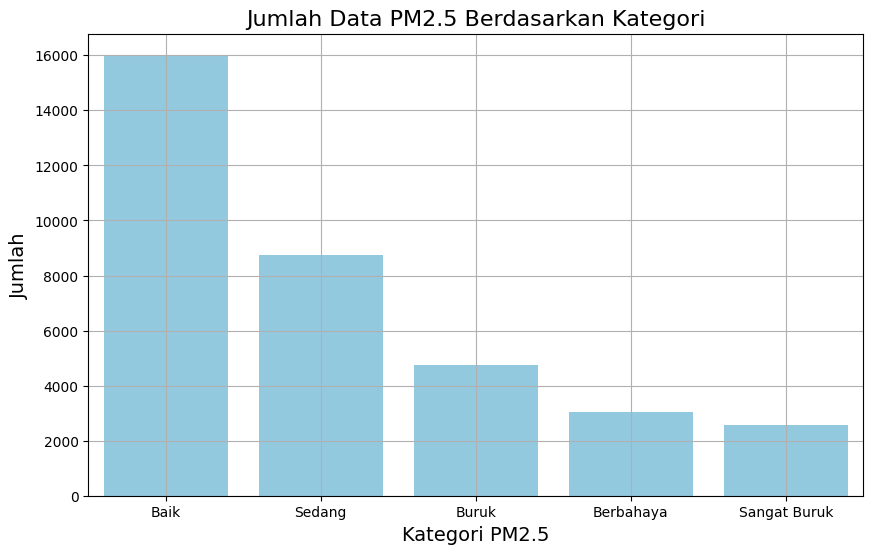

In [74]:

# 1. Menentukan rentang kategori PM2.5
def categorize_pm25(value):
    if value <= 50:
        return 'Baik'
    elif value <= 100:
        return 'Sedang'
    elif value <= 150:
        return 'Buruk'
    elif value <= 200:
        return 'Sangat Buruk'
    else:
        return 'Berbahaya'

# 2. Mengaplikasikan fungsi binning pada kolom PM2.5
df_final['Kategori PM2.5'] = df_final['PM2.5'].apply(categorize_pm25)

# 3. Menghitung jumlah data dalam setiap kategori
category_counts = df_final['Kategori PM2.5'].value_counts().reset_index()
category_counts.columns = ['Kategori PM2.5', 'Jumlah']

# 4. Menampilkan jumlah data berdasarkan kategori
print(category_counts)

# 5. Visualisasi hasil pengelompokan dengan satu warna
plt.figure(figsize=(10, 6))
sns.barplot(x='Kategori PM2.5', y='Jumlah', data=category_counts, color='skyblue')  # Menggunakan satu warna
plt.title('Jumlah Data PM2.5 Berdasarkan Kategori', fontsize=16)
plt.xlabel('Kategori PM2.5', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.grid(True)
plt.show()


**Insight:**
- Lebih dari 16.000 pengukuran PM2.5 berada dalam kategori baik, menunjukkan kualitas udara yang sebagian besar dapat diterima.

- Jumlah pengukuran dalam kategori sedang juga cukup tinggi, menunjukkan frekuensi kualitas udara yang kurang optimal.

- Lebih dari 6.000 pengukuran tercatat dalam kategori buruk, menunjukkan periode di mana kualitas udara tidak memenuhi standar kesehatan yang baik.

- Kategori "Sangat Buruk" dan "Berbahaya" memiliki pengukuran yang jauh lebih rendah, masing-masing kurang dari 2.000, tetapi tetap memerlukan perhatian.

- Sebaran kategori PM2.5 menunjukkan bahwa, meskipun kualitas udara sebagian besar baik, ada periode tertentu yang memerlukan perhatian dan tindakan untuk memastikan kesehatan masyarakat dan lingkungan tetap terjaga.

## Conclusion

- Analisis menunjukkan bahwa tidak ada hubungan yang signifikan antara suhu dan konsentrasi PM2.5. Meskipun model regresi linier menunjukkan kecenderungan penurunan PM2.5 seiring dengan peningkatan suhu, nilai R-squared yang sangat rendah (0.022) menunjukkan bahwa suhu hanya menjelaskan sedikit variasi dalam tingkat polusi. Ini menunjukkan bahwa faktor-faktor lain, seperti aktivitas manusia dan kondisi meteorologis lainnya, lebih berperan dalam mempengaruhi kualitas udara.

- Dari analisis distribusi PM2.5 berdasarkan arah angin, terlihat bahwa arah angin dari timur (E dan ENE) cenderung memiliki konsentrasi PM2.5 yang lebih tinggi, mengindikasikan adanya potensi sumber polusi di arah tersebut. Sebaliknya, arah angin dari barat laut (NNW) dan utara (N) menunjukkan kualitas udara yang lebih baik, dengan rata-rata konsentrasi PM2.5 yang lebih rendah. Hal ini menunjukkan pentingnya arah angin dalam memahami pola polusi udara, yang dapat berkontribusi pada perencanaan kebijakan mitigasi polusi.

- Sebagian besar data PM2.5 berada dalam kategori baik, tetapi terdapat lebih dari 6.000 pengukuran dalam kategori buruk. Ini menandakan bahwa meskipun kualitas udara sebagian besar baik, ada periode di mana kualitas dapat menurun, memerlukan perhatian lebih lanjut.